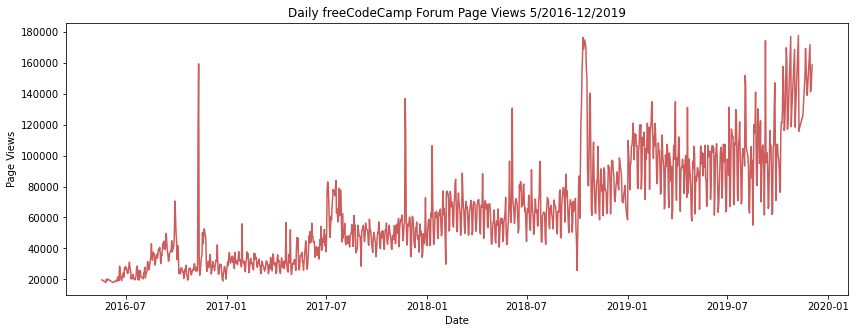

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = (pd.read_csv('fcc-forum-pageviews.csv')).sort_values(by=['value'])

# Clean data
df['date'] = pd.to_datetime(df['date'], format = "%Y-%m-%d")

values_length= len(df.value)
p_high = 97.5*(values_length )/100
p_high = int(round(p_high))
p_low = 2.5*(values_length )/100
p_low = int(round(p_low))

df = df.iloc[p_low:p_high,:].sort_values(by=['date'])


df_line = df.copy() 
  
# Draw line plot
fig, ax = plt.subplots(figsize=(14, 5))

dates = list(df_line.date)
values = list(df_line.value)

ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth = (1, 7)))
#ax.set_facecolor("white")
#plt.xticks( ha='right')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.plot(dates, values, '-', color='indianred' )

plt.show()


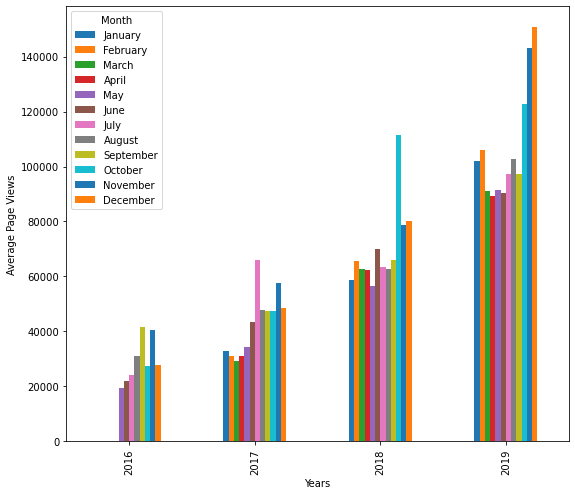

In [25]:

# Copy and modify data for monthly bar plot
df_br = df.copy()
df_br['Month'] = df_br['date'].dt.month
df_br = pd.pivot_table(data=df_br, index=df_br.date.dt.year, columns=["Month"], values='value', aggfunc='mean')
df_br.columns = pd.to_datetime(df_br.columns, format='%m').month_name()
  
df_bar = df_br

# Draw bar plot
fig, ax = plt.subplots(figsize=(9,8))

df_bar.plot(ax = ax, kind='bar')
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.legend(title="Month", loc=2,fontsize=10, title_fontsize=10)
#prop={'size': 36})
  
plt.show()

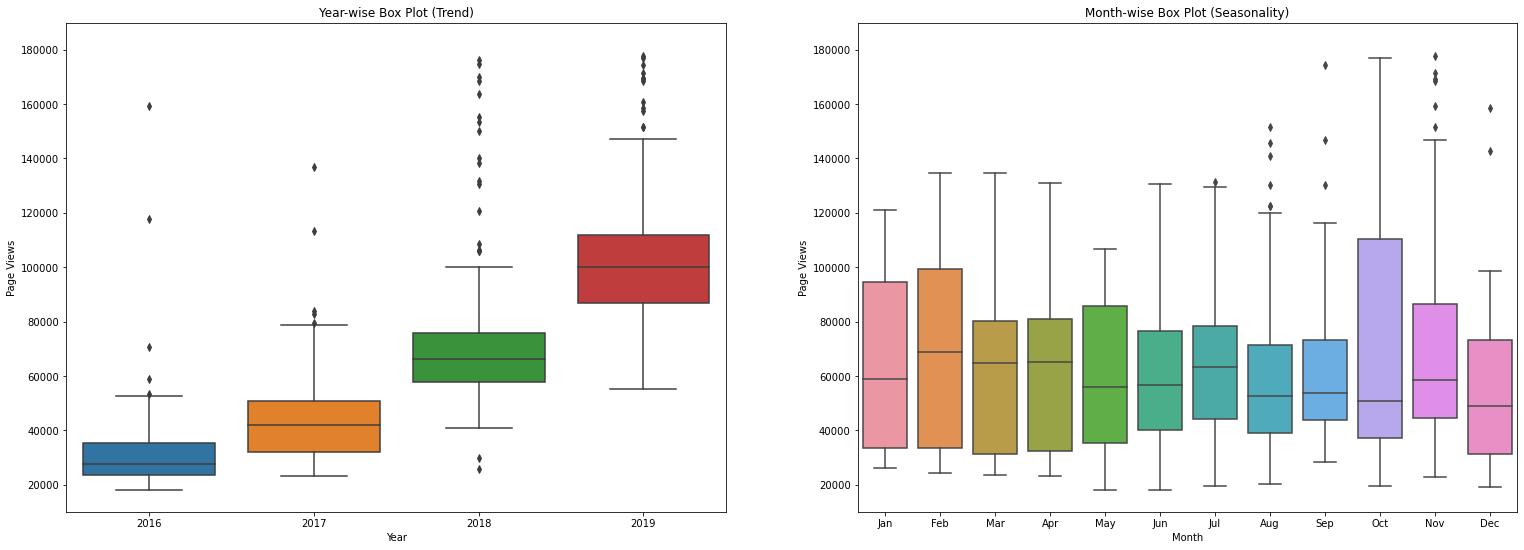

In [27]:

    # Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
fig, axes = plt.subplots(1,2, figsize=(26, 9))

sns.boxplot(data=df_box, ax=axes[0],x='year',y='value')
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
axes[0].set(ylim=([10000,190000]))
    
sns.boxplot(ax=axes[1],data=df_box,x='month',y='value',order =['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')
axes[1].set(ylim=([10000,190000]))
 
plt.show()